## Part 1: Understanding the Structure of the Dataset

In [1]:
! pip install pandas

In [2]:
import pandas as pd

# Load the Dataset
df = pd.read_csv('second_hand_cars.csv')

# Data Types
print(df.dtypes)

# Data Shape
print(df.shape)

# Feature Descriptions
print(df.columns)
print(df.head())


Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object
(2500, 16)
Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories'],
      dtype='object')
    Company Name Car Name   Variant Fuel Type     Tyre Condition  Make Year  \
0  Maruti Suzuki    Cruze        EX 

# Part 2: Handling Missing Data and Outliers

Handling the missing data

In [3]:
# Identify Missing Values
print(df.isnull().sum())


Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64


In [7]:
# Example: Fill missing values for 'Mileage' with the median
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)

In [8]:
# Example: Drop rows with missing 'Price'
df.dropna(subset=['Price'], inplace=True)

# Handling Outliers

In [10]:
! pip install numpy 
! pip install seaborn 
! pip install matplotlib.pyplot 

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

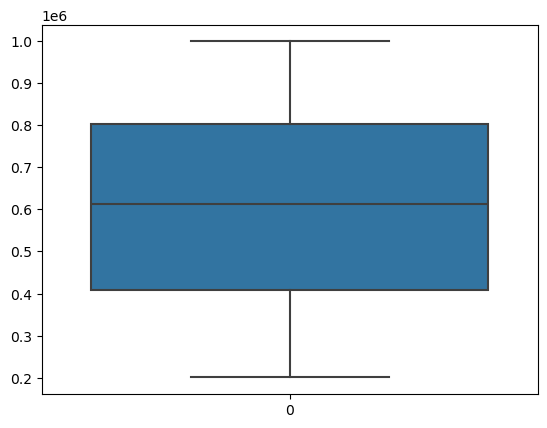

In [12]:
# Identify Outliers using Box Plot
sns.boxplot(df['Price'])
plt.show()


In [13]:
# Example: Remove outliers based on IQR for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= (Q1 - 1.5 * IQR)) & (df['Price'] <= (Q3 + 1.5 * IQR))]

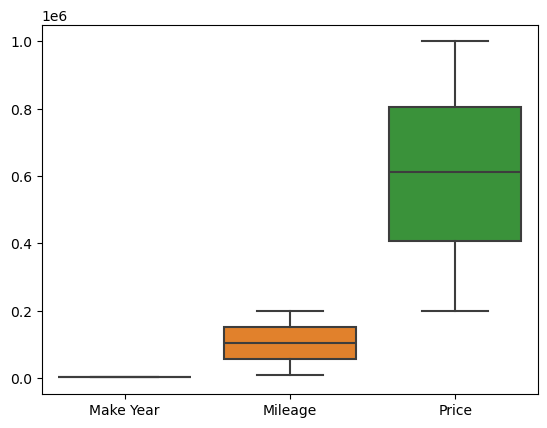

In [16]:
sns.boxplot(df)
plt.show()


# Part 3: Exploratory Data Analysis Techniques

In [17]:
# Summary Statistics for Numerical Data
print(df.describe())

         Make Year        Mileage          Price
count  2500.000000    2500.000000    2500.000000
mean   2019.521600  104777.792000  608120.897600
std       2.894146   55544.487467  231056.126713
min    2015.000000   10010.000000  200176.000000
25%    2017.000000   56313.000000  407791.000000
50%    2020.000000  104209.500000  612012.500000
75%    2022.000000  152149.250000  804567.000000
max    2024.000000  199755.000000  999826.000000


In [18]:
# Frequency Counts for Categorical Data
print(df['Fuel Type'].value_counts())
print(df['Owner Type'].value_counts())

Fuel Type
CNG       840
Diesel    833
Petrol    827
Name: count, dtype: int64
Owner Type
Third     855
Second    833
First     812
Name: count, dtype: int64


# Data Visualization

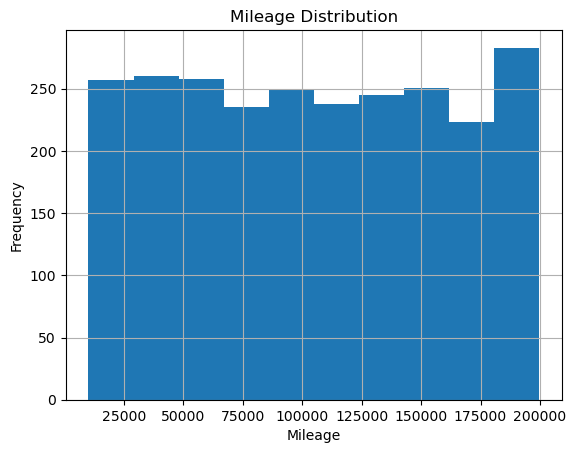

In [19]:
# Histograms
df['Mileage'].hist()
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

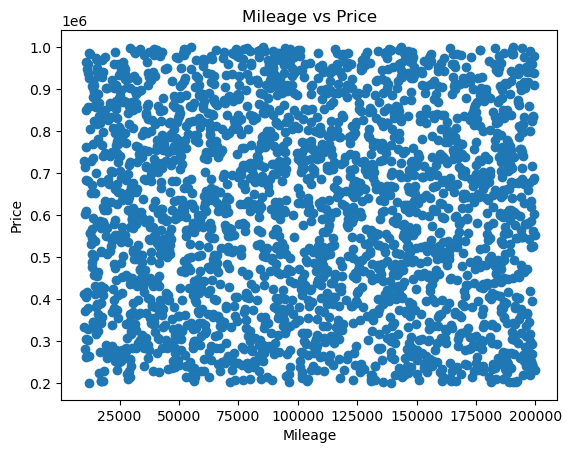

In [20]:
# Scatter Plot
plt.scatter(df['Mileage'], df['Price'])
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

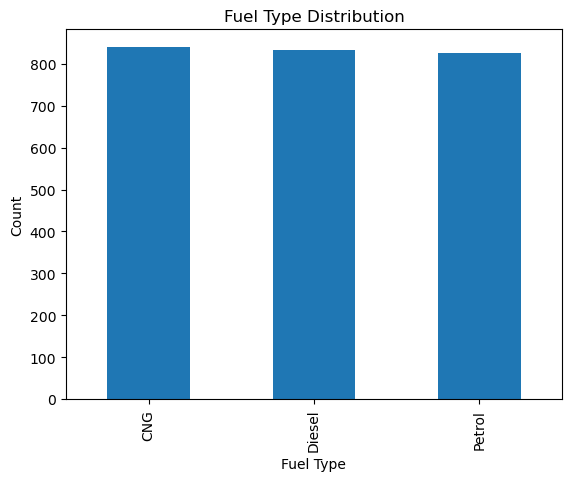

In [21]:
# Bar Chart for Categorical Data
df['Fuel Type'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

# Part 4: Feature Engineering

Creating New Features

In [22]:
# Extract Year from 'Make Year'
df['Car Age'] = 2024 - df['Make Year']

# Convert Categorical Variables into Dummy Variables
df = pd.get_dummies(df, columns=['Fuel Type', 'Transmission Type', 'Tyre Condition', 'Owner Type'], drop_first=True)


Transforming Existing Features

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize Numerical Features
scaler = StandardScaler()
df[['Mileage', 'Price']] = scaler.fit_transform(df[['Mileage', 'Price']])

# Label Encoding
le = LabelEncoder()
df['Company Name'] = le.fit_transform(df['Company Name'])


Feature Selection

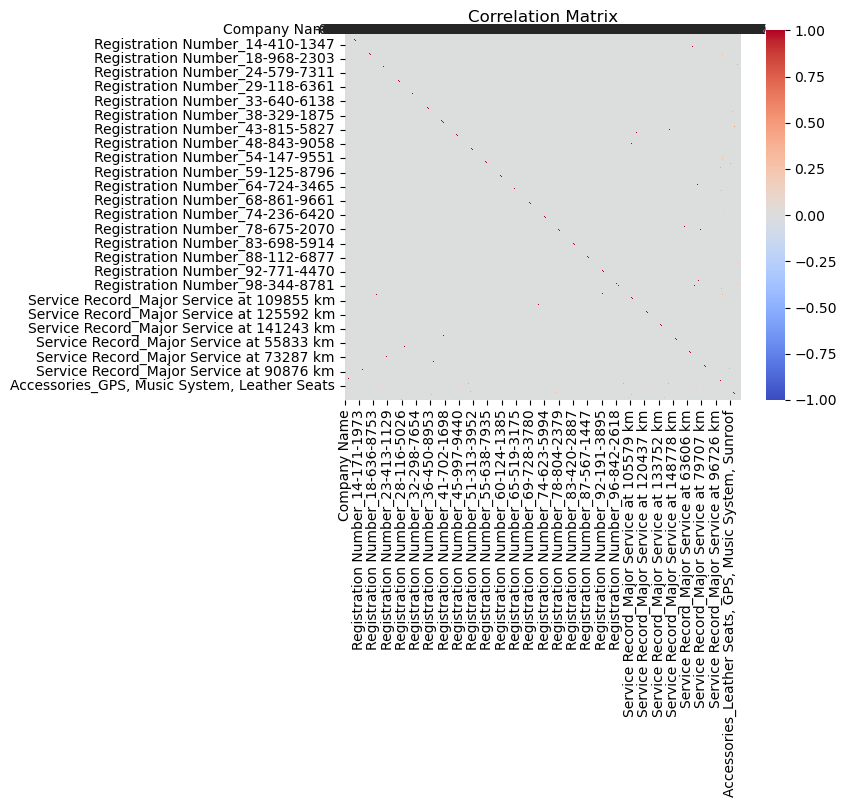

Mileage                                      1.377277e-01
Company Name                                 5.385750e-02
Car Age                                      2.915237e-02
Make Year                                    2.893677e-02
Registration Certificate_Not Available       1.318743e-02
                                                 ...     
Service Record_Major Service at 123449 km    3.772820e-08
Registration Number_70-594-6019              2.313471e-08
Service Record_Major Service at 94054 km     1.733036e-09
Registration Number_76-154-5485              3.642434e-11
Registration Number_36-389-2907              0.000000e+00
Length: 3587, dtype: float64


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

X = df.drop('Price', axis=1, errors='ignore')  # Exclude 'Price' from features
y = df['Price'] if 'Price' in df.columns else None

if y is not None:

    X_encoded = pd.get_dummies(X, drop_first=True)
    

    if X_encoded.isnull().sum().sum() == 0:
        # Correlation Matrix
        corr_matrix = X_encoded.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

        # Feature Importance using RandomForest
        model = RandomForestRegressor()
        model.fit(X_encoded, y)
        importances = model.feature_importances_
        feature_names = X_encoded.columns
        feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
        print(feature_importance)
    else:
        print("There are missing values in the feature matrix.")
else:
    print("Price column is not present in the DataFrame.")
